In [109]:
import pandas as pd
import seaborn as se
import pickle
from collections import Counter
import numpy as np
import os
import pickle
from timeit import timeit
import json
from timeit import default_timer as timer
from pathlib import Path
import shutil
import math
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm

In [110]:
arch_metrics = pd.read_csv('../data/arch_metrics.csv', index_col=[0,1],)

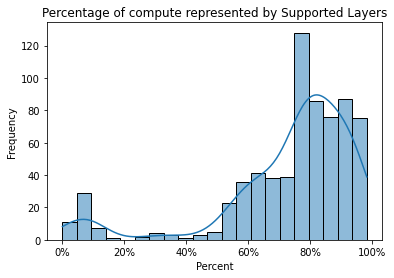

In [111]:
import matplotlib.ticker as mtick

plt = se.histplot(x = arch_metrics["percent_of_compute"].groupby(level=0).sum().multiply(100), kde=True)
plt.set_title('Percentage of compute represented by Supported Layers')
plt.set_xlabel('Percent')
plt.set_ylabel('Frequency')
plt.xaxis.set_major_formatter(mtick.PercentFormatter())


Text(0.5, 1.0, 'Accelerator Speedup Factor Over CPU Baseline')

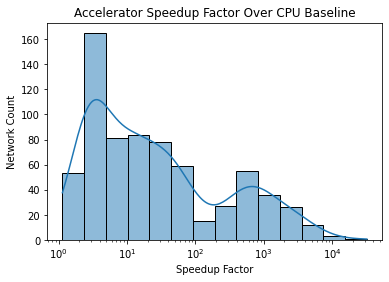

In [112]:
plt = se.histplot(x = arch_metrics['speedup'].groupby(level=0).mean(), log_scale=True, kde=True)
plt.set_xscale('log', base=10)
plt.set_xlabel('Speedup Factor')
plt.set_ylabel('Network Count')
plt.set_title('Accelerator Speedup Factor Over CPU Baseline')

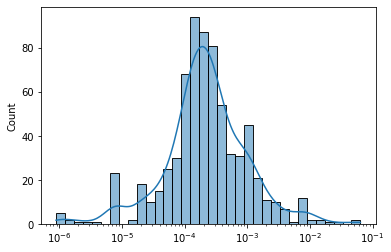

In [122]:
joules_per_inference = arch_metrics.groupby(level = 0).mean().loc[:, ~arch_metrics.columns.isin(['latency', 'load_bw', 'store_bw', 'speedup', 'percent_of_compute', 'util'])].sum(axis = 1)
plt = se.histplot(joules_per_inference, log_scale=True, kde=True)
plt.set_xscale('log', base=10)
# plt.set_xlabel('Speedup Factor')
# plt.set_ylabel('Network Count')
# plt.set_title('Accelerator Speedup Factor Over CPU Baseline')

In [120]:
energy_df

beit_base_patch16_224           0.001365
beit_base_patch16_224_in22k     0.001365
beit_base_patch16_384           0.011008
beit_large_patch16_224          0.000702
beit_large_patch16_224_in22k    0.000702
                                  ...   
xcit_tiny_24_p16_224_dist       0.000023
xcit_tiny_24_p16_384_dist       0.000154
xcit_tiny_24_p8_224             0.000064
xcit_tiny_24_p8_224_dist        0.000064
xcit_tiny_24_p8_384_dist        0.000532
Length: 695, dtype: float64

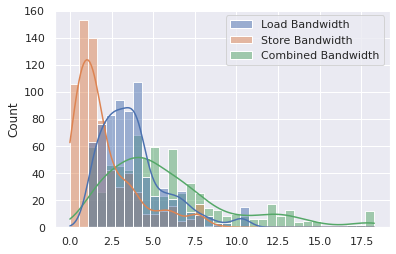

In [91]:
bw_df = arch_metrics.groupby(level = 0).mean().loc[:, arch_metrics.columns.isin(['load_bw', 'store_bw'])].div(2**30)
bw_df["combined"] = bw_df["load_bw"] + bw_df["store_bw"]
bw_df = bw_df.rename(columns={'load_bw': "Load Bandwidth", "store_bw": "Store Bandwidth", "combined":"Combined Bandwidth"})
plt = se.histplot(data = bw_df, kde=True)

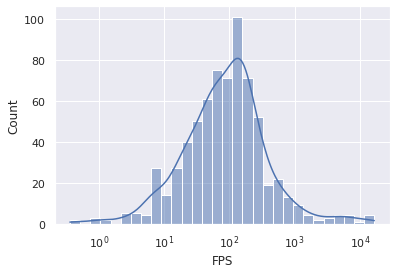

In [98]:
fps = arch_metrics.groupby(level = 0).sum().loc[:, arch_metrics.columns.isin(['latency'])].mul(1*10**-9).pow(-1)
fps = fps.rename(columns={"latency": "FPS"})
plt = se.histplot(data = fps, x = "FPS", kde=True, log_scale=True)

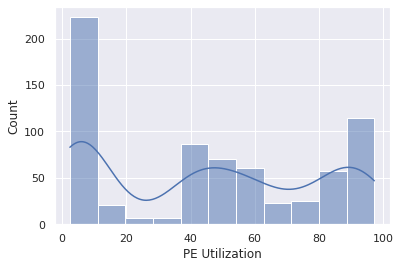

In [107]:
util = arch_metrics.groupby(level = 0).mean().loc[:, arch_metrics.columns.isin(['util'])].mul(100)
util = util.rename(columns={"util": "PE Utilization"})
plt = se.histplot(data = util, x = "PE Utilization", kde=True)